In [257]:
import cv2
import numpy as np
import os
from MagicBox.dataset.artificial_dataset import ArtificialDataset
from utils import plot_images
import yaml

%load_ext autoreload
%autoreload 2
%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [261]:
with open(os.path.join('..', 'config.yaml'), 'r') as f:
    config = yaml.safe_load(f)
    gen = ArtificialDataset('training', config['data'])




training:   0%|          | 0/2 [00:00<?, ?it/s]

                                               

validation:   0%|          | 0/2 [00:00<?, ?it/s]

                                                 

test:   0%|          | 0/2 [00:00<?, ?it/s]

                                           

training:   0%|          | 0/2 [00:00<?, ?it/s]

                                               

validation:   0%|          | 0/2 [00:00<?, ?it/s]

                                                 

test:   0%|          | 0/2 [00:00<?, ?it/s]

                                           

training:   0%|          | 0/2 [00:00<?, ?it/s]

training:  50%|█████     | 1/2 [00:00<00:00,  4.13it/s]

training: 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                                                       

validation:   0%|          | 0/2 [00:00<?, ?it/s]

validation:  50%|█████     | 1/2 [00:00<00:00,  3.66it/s]

validation: 100%|██████████| 2/2 [00:00<00:00,  3.41it/s]

                             

In [262]:
config = {
    'data_path': '../dataset',
    'suffix': 'v1',
    'primitives': 'all',
    'validation_size': 30,
    'test_size': 50,
    'truncate': {'draw_ellipses': 0.3, 'draw_stripes': 0.2, 'gaussian_noise': 0.1},
    'preprocessing': {'resize': [120, 160], 'blur_size': 21}
}

dataset = ArtificialDataset('test', config)


/tmp/draw_multiple_polygons/points/test/0.npy
[[111.     60.375]
 [ 26.375  59.375]
 [ 69.125  20.   ]
 [122.875  82.375]
 [127.375  68.875]
 [144.375  75.375]
 [ 39.     86.75 ]
 [ 35.875  74.5  ]
 [ 44.375  75.   ]
 [126.875  62.625]
 [ 96.625  19.25 ]
 [106.25    5.   ]
 [ 33.875  43.875]
 [ 10.     40.5  ]
 [ 30.25   24.125]
 [ 49.125  21.125]
 [ 31.25   10.   ]
 [ 49.625  12.75 ]
 [123.5    84.   ]
 [117.75   71.625]
 [141.125  61.125]
 [147.125  76.625]]


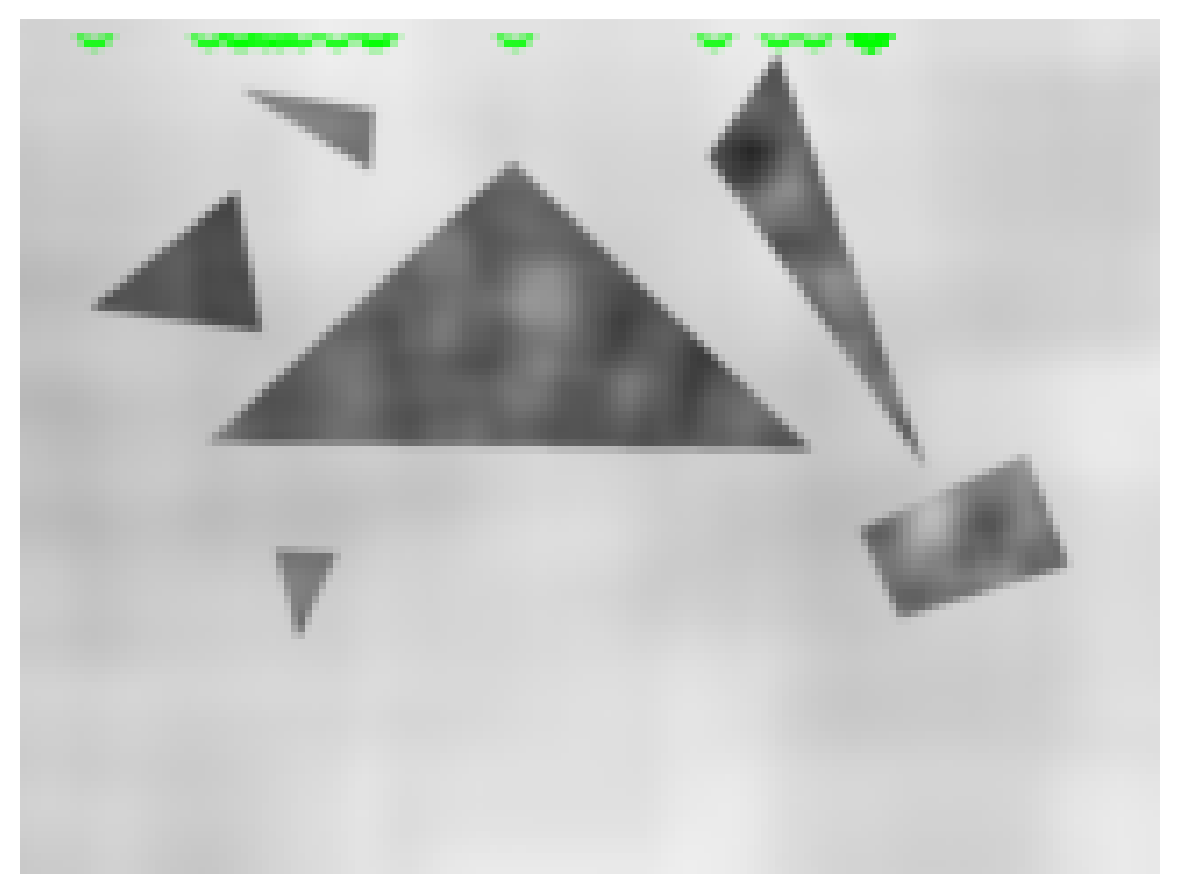

In [270]:
def draw_keypoints(img, points, color):
    keypoints = [cv2.KeyPoint(c[1], c[0], 1) for c in np.stack(points).T]
    return cv2.drawKeypoints(img[0].astype(np.uint8), keypoints, None, color=color)

rows = 1
columns = 1 

for _ in range(rows):
    frames = []
    for _ in range(columns):
        np.random.seed(25)
        
        index = np.random.randint(low=0, high=dataset.__len__())
        image, points, keypoint_map = dataset.__getitem__(index)
        
        print(points)
        
        frame = draw_keypoints(image, np.where(keypoint_map), (0, 255, 0))
        frames.append(frame / 255)
        
    plot_images(frames, dpi=200)

[[140.875   5.875]
 [ 78.375  15.75 ]
 [151.125  77.625]
 [  3.375 102.75 ]
 [104.25   22.25 ]
 [ 77.125  30.625]]
